### IMPORT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Show the data

In [2]:
data = pd.read_csv("D:/PYTHON 2/DATA/JUN/BigBasket.csv")
data.tail()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url
8203,"Foil Alphabet Balloon - Letter V, Party Decor,...",Bvishal,49.0,25.0,https://www.bigbasket.com/media/uploads/p/l/40...,1 pc,Cleaning & Household,"Caps, Balloons & Candles",https://www.bigbasket.com/pd/40237020/bvishal-...
8204,"Decoration Balls - Used For Parties, Unique De...",Bvishal,399.0,249.0,https://www.bigbasket.com/media/uploads/p/l/40...,6 pcs,Cleaning & Household,Decorations,https://www.bigbasket.com/pd/40237682/bvishal-...
8205,Foundation Blending Brush - 230,PAC,465.0,232.5,https://www.bigbasket.com/media/uploads/p/l/40...,1 pc,Beauty & Hygiene,Makeup Accessories,https://www.bigbasket.com/pd/40175488/pac-foun...
8206,One Week Immunity Booster,The Healthy Company,799.0,799.0,https://www.bigbasket.com/media/uploads/p/l/40...,28 g,Beauty & Hygiene,Supplements & Proteins,https://www.bigbasket.com/pd/40200885/the-heal...
8207,"Blush & Glow - Green Apple Apricot Gel Scrub, ...",Lakme,250.0,175.0,https://www.bigbasket.com/media/uploads/p/l/40...,100 g,Beauty & Hygiene,Face Care,https://www.bigbasket.com/pd/40224773/lakme-bl...


In [3]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url'],
      dtype='object')

In [4]:
data.dtypes

ProductName       object
Brand             object
Price            float64
DiscountPrice    float64
Image_Url         object
Quantity          object
Category          object
SubCategory       object
Absolute_Url      object
dtype: object

In [5]:
data.size

73872

In [6]:
data.isnull().sum()

ProductName      0
Brand            0
Price            0
DiscountPrice    0
Image_Url        0
Quantity         0
Category         0
SubCategory      0
Absolute_Url     0
dtype: int64

### 1) How many unique brands are there? 

In [7]:
len(data['Brand'].unique())

842

### 2) Which are the top 10 most frequent brands?

In [8]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url'],
      dtype='object')

In [9]:
data['Brand'].value_counts().head(10)

Brand
Fresho        479
BB Royal      410
BB Home       183
Healthvit      98
Soulflower     88
DP             88
GoodDiet       87
Lakme          84
Nivea          83
BIOTIQUE       79
Name: count, dtype: int64

### 3) What is the average discounts across all Product?

In [10]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url'],
      dtype='object')

In [11]:
(data['Price'] - data['DiscountPrice']).mean()

np.float64(188.51062134502925)

### 4) Which Products have the Highest & lowest discount(Price-DiscountPrice)

In [12]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url'],
      dtype='object')

In [13]:
# First calculate the discount
data['Discount'] = data['Price'] - data['DiscountPrice']

# Find highest discount product
Highest_Discount = data.loc[data['Discount'].idxmax()]

# Find lowest discount product
Lowest_Discount = data.loc[data['Discount'].idxmin()]
Highest_Discount, Lowest_Discount

(ProductName      4 Burner Glaze MS Cook Top Gas Stove - Manual ...
 Brand                                                  Surya Flame
 Price                                                       8595.0
 DiscountPrice                                               3449.0
 Image_Url        https://www.bigbasket.com/media/uploads/p/l/40...
 Quantity                                                      1 pc
 Category                                    Kitchen, Garden & Pets
 SubCategory                                              Gas Stove
 Absolute_Url     https://www.bigbasket.com/pd/40212804/surya-fl...
 Discount                                                    5146.0
 Name: 7690, dtype: object,
 ProductName                                         Eggs - Regular
 Brand                                                       Fresho
 Price                                                        250.0
 DiscountPrice                                                250.0
 Image_Url        ht

### 5) What are the unique category & Subcategory?

In [14]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url', 'Discount'],
      dtype='object')

In [15]:
data[['Category', 'SubCategory']].drop_duplicates().shape[0]

334

### 6) How many Products are there per category subcategory?

In [16]:
category_subcategory_counts = data.groupby(['Category', 'SubCategory']).size().reset_index(name='ProductCount')
category_subcategory_counts.sort_values(by='ProductCount', ascending=False)

,Category,SubCategory,ProductCount
56,Beauty & Hygiene,Face Care,825
81,Beauty & Hygiene,Supplements & Proteins,240
54,Beauty & Hygiene,Face,207
42,Beauty & Hygiene,Body Care,205
78,Beauty & Hygiene,Shampoo & Conditioner,201
...,...,...,...
309,Snacks & Branded Foods,Gift Boxes,1
26,"Bakery, Cakes & Dairy",Muffins & Cup Cakes,1
289,"Kitchen, Garden & Pets",Umbrella,1
329,Snacks & Branded Foods,Salted Biscuits,1


### 7) Which category has the highest average discount?

In [17]:
data.columns

Index(['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Image_Url',
       'Quantity', 'Category', 'SubCategory', 'Absolute_Url', 'Discount'],
      dtype='object')

In [18]:
data['Category'].mean

<bound method Series.mean of 0        Fruits & Vegetables
1        Fruits & Vegetables
2        Fruits & Vegetables
3        Fruits & Vegetables
4        Fruits & Vegetables
                ...         
8203    Cleaning & Household
8204    Cleaning & Household
8205        Beauty & Hygiene
8206        Beauty & Hygiene
8207        Beauty & Hygiene
Name: Category, Length: 8208, dtype: object>

### 8) What is the distribution of orginal and discounted prices?

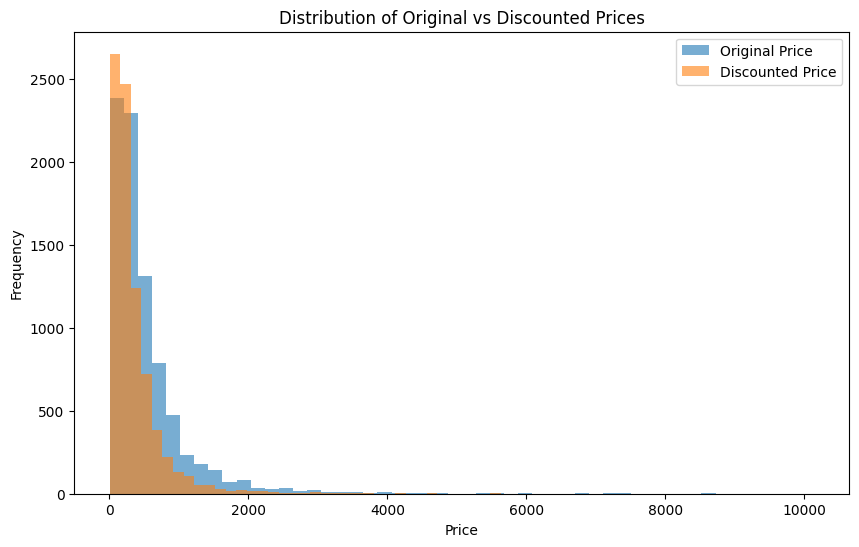

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=50, alpha=0.6, label='Original Price')
plt.hist(data['DiscountPrice'], bins=50, alpha=0.6, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original vs Discounted Prices')
plt.legend()
plt.show()

### 9) Is there any category where discounnted price are higher than orginal prices?

In [24]:
data[data['DiscountPrice'] > data['Price']]

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url,Discount


### 10) Are there any dupilicate product entries(based on name,brand,quantity)?

In [26]:
data[data.duplicated(subset=['ProductName', 'Brand', 'Quantity'], keep=False)]

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url,Discount
68,Original Extra Virgin Olive Oil,BORGES,1400.0,728.00,https://www.bigbasket.com/media/uploads/p/l/40...,1 L,Gourmet & World Food,Extra Virgin Olive Oil,https://www.bigbasket.com/pd/40006250/borges-e...,672.00
120,"Cream Beauty Bathing Bar, Has 1/4th Moisturizi...",Dove,472.0,401.00,https://www.bigbasket.com/media/uploads/p/l/40...,125 g,Beauty & Hygiene,Bathing Bars & Soaps,https://www.bigbasket.com/pd/40016743/dove-cre...,71.00
122,"Cream Beauty Bathing Bar, Has 1/4th Moisturizi...",Dove,280.0,230.00,https://www.bigbasket.com/media/uploads/p/l/26...,125 g,Beauty & Hygiene,Bathing Bars & Soaps,https://www.bigbasket.com/pd/266706/dove-cream...,50.00
274,Chicken Curry Cut Without Skin 500 g + Chicken...,Fresho,623.0,400.00,https://www.bigbasket.com/media/uploads/p/l/12...,Combo,"Eggs, Meat & Fish",Fresh Chicken,https://www.bigbasket.com/pd/1221158/fresho-ch...,223.00
275,Chicken Curry Cut Without Skin 500 g + Chicken...,Fresho,623.0,400.00,https://www.bigbasket.com/media/uploads/p/l/12...,Combo,"Eggs, Meat & Fish",Fresh Chicken,https://www.bigbasket.com/pd/1221156/fresho-ch...,223.00
...,...,...,...,...,...,...,...,...,...,...
7345,Radiant Liquid Shadow,Nicka K,549.0,274.50,https://www.bigbasket.com/media/uploads/p/l/40...,5 g,Beauty & Hygiene,Eyes,https://www.bigbasket.com/pd/40222349/nicka-k-...,274.50
7564,Lip Bomb,Blue Heaven,125.0,77.50,https://www.bigbasket.com/media/uploads/p/l/40...,8 g,Beauty & Hygiene,Lip Care,https://www.bigbasket.com/pd/40188472/blue-hea...,47.50
7565,Lip Bomb,Blue Heaven,125.0,80.00,https://www.bigbasket.com/media/uploads/p/l/40...,8 g,Beauty & Hygiene,Lip Care,https://www.bigbasket.com/pd/40188473/blue-hea...,45.00
7853,Super Lustrous Matte Lipstick,Revlon,699.0,524.00,https://www.bigbasket.com/media/uploads/p/l/40...,4.2 g,Beauty & Hygiene,Lips,https://www.bigbasket.com/pd/40066900/revlon-s...,175.00


### Advance Question 

### 1) Create A Column and Find which Product Have The Top 5 Highest Discounts.

In [31]:
data['Discount'] = data['Price'] - data['DiscountPrice']

In [32]:
Top5_Discounts = data.sort_values(by='Discount', ascending=False).head(5)

In [33]:
Top5_Discounts[['ProductName', 'Brand', 'Price', 'DiscountPrice', 'Discount']]

,ProductName,Brand,Price,DiscountPrice,Discount
7690,4 Burner Glaze MS Cook Top Gas Stove - Manual ...,Surya Flame,8595.0,3449.0,5146.0
7689,3 Burner Glaze MS Cook Top Gas Stove - Manual ...,Surya Flame,7345.0,2699.0,4646.0
7950,Aluminium Non-Stick Ceramic Coated Magic Pan -...,Nirlon,6755.0,2499.0,4256.0
4785,Extra Light Olive Oil,Disano,7195.0,3165.8,4029.2
7440,Extra Light Olive Oil,Rafael Salgado,6999.0,2970.0,4029.0


### 2) Analyze Price Differences Between Brands Within The Same Subcategory.  

In [34]:
data.groupby(['SubCategory', 'Brand'])[['Price', 'DiscountPrice']].mean().reset_index()

,SubCategory,Brand,Price,DiscountPrice
0,Adult Diapers,Friends,345.000000,264.450000
1,Adult Diapers,Lifree,600.000000,450.000000
2,Adult Diapers,Seni,649.000000,486.750000
3,"Aerated, Still, Sparkling",ESTUARY,200.000000,150.000000
4,"Aerated, Still, Sparkling",Kingfisher,50.000000,37.500000
...,...,...,...,...
1802,Women's Deodorants,Saba,249.000000,174.300000
1803,Women's Deodorants,Secret Temptation,448.500000,269.100000
1804,Women's Deodorants,Spinz,306.000000,168.848000
1805,Women's Deodorants,Yardley London,492.461538,306.605385


In [35]:
data.groupby(['SubCategory', 'Brand'])['Price'].agg(['mean', 'std', 'min', 'max']).reset_index()

,SubCategory,Brand,mean,std,min,max
0,Adult Diapers,Friends,345.000000,325.269119,115.0,575.0
1,Adult Diapers,Lifree,600.000000,NaN,600.0,600.0
2,Adult Diapers,Seni,649.000000,NaN,649.0,649.0
3,"Aerated, Still, Sparkling",ESTUARY,200.000000,NaN,200.0,200.0
4,"Aerated, Still, Sparkling",Kingfisher,50.000000,NaN,50.0,50.0
...,...,...,...,...,...,...
1802,Women's Deodorants,Saba,249.000000,NaN,249.0,249.0
1803,Women's Deodorants,Secret Temptation,448.500000,211.424928,299.0,598.0
1804,Women's Deodorants,Spinz,306.000000,157.773572,195.0,585.0
1805,Women's Deodorants,Yardley London,492.461538,215.012641,225.0,900.0
